============================================================================================

# Extra Tree


============================================================================================


In [1]:
import warnings

warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
import pandas as pd
import numpy as np
import os
import re
import time
import random
from matplotlib import pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier


from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization

from sklearn.decomposition import PCA

from src import fns_models as fns


% matplotlib inline

from subprocess import check_output
print(check_output(["ls", "data"]).decode("utf-8"))

athenaeum_authors_preview.csv
athenaeum_painting_filtered.csv
athenaeum_paintings.csv
athenaeum_paintings_sizes.csv
color_histograms.csv
complete_data.csv
extra_tree_com.csv
grad_boost_com.csv
images
images_athenaeum
images_sizes_2325.csv
nbc_com.csv
net_predicted.csv
painter_info_clean.csv
painting_info_clean.csv
resized_200
rf_com.csv
test_author200.csv
test_data.csv
test_hist_author_knn.csv
test_hist_author_rf.csv
train_author200.csv
train_data.csv
train_hist_author_knn.csv
train_hist_author_rf.csv
xgb_com.csv



In [3]:
train, train_labels, test, test_labels = fns.get_top_author(3)


[INFO] The size of train histogram for Random Forest(49890, 35)
[INFO] The size of test histogram for Random Forest(12473, 35)
24      1369
1793    1338
368     1335
Name: author_id, dtype: int64
[trian above] ==================================================[test below]
24      342
1793    335
368     334
Name: author_id, dtype: int64
(4042,)
(4042, 35)


In [4]:
# Do not run it 
# train = train.sample(10)
# test = test.sample(7)
# train_labels = train_labels.sample(10)
# test_labels = test_labels.sample(7)

================================================================================================================

# Bayesian Optimization + Extra Tree

[bayesian-optimization](https://github.com/fmfn/BayesianOptimization/blob/master/bayes_opt/bayesian_optimization.py)

================================================================================================================

In [4]:
def extr_evaluate(max_features, max_depth, n_estimators):
    
    random.seed(2017)
#     params['max_features'] = int(max_features)
#     params['max_depth'] = int(max_depth)
#     params['n_estimators'] = int(n_estimators)
    
    extrc = ExtraTreesClassifier(n_jobs = 4, n_estimators=int(n_estimators), oob_score=True,
                                max_depth = int(max_depth), max_features = int(max_features),
                                random_state = 2017, bootstrap=True)
    #scores = cross_val_score(extrc, X=train, y = train_labels, cv=5, n_jobs = 2)
    
    # The mean score and the 95% confidence interval of the score estimate are hence given by:
    #print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    #return scores.mean()
    extrc.fit(train, train_labels)
    return extrc.oob_score_

def extr_pca_evaluate(max_features,
                    max_depth,
                    n_estimators):
    
    
    extrc = ExtraTreesClassifier(n_jobs = 4, n_estimators=int(n_estimators), oob_score=True,
                                max_depth = int(max_depth), max_features = int(max_features),
                                random_state = 2017, bootstrap=True)
    
    extrc.fit(pca_transformed, train_labels)
    return extrc.oob_score_

def extr_bo(extr_fnc=extr_evaluate):
    start_time = time.time()
    num_iter = 25
    init_points = 5
    random_state = 2017
    # params = {
    #     #'eta': 0.1,
    #     #'silent': 1,
    #     'eval_metric': 'mae',
    #     'verbose_eval': True,
    #     #'seed': random_state
    # }

    extrBO = BayesianOptimization(extr_fnc, {'max_features': (5, 7),
                                             'max_depth': (2, 7),
                                             'n_estimators': (100, 900)})

    extrBO.maximize(init_points=init_points, n_iter=num_iter)
    
    print('-' * 53)
    print '\n%f' % (time.time() - start_time)
    
    print "Bayesian Optimization Best Score: %f" % extrBO.res['max']['max_val']

    print "Bayesian Optimization Best Parameters: %s" % str(extrBO.res['max']['max_params'])
    
    print (extrBO.res['max'])
    
#     fns.plot_bo(extr_fnc, extrBO)

#     print "Bayesian Optimization  Parameters: %s" % str(extrBO.res['all'])



In [5]:
# Run BO for color histogram
extr_bo(extr_evaluate)

Initialization
-----------------------------------------------------------------------------
 Step |   Time |      Value |   max_depth |   max_features |   n_estimators | 
    1 | 00m02s |    0.62593 |      4.5541 |         6.9384 |       371.0293 | 
    2 | 00m04s |    0.60317 |      2.7502 |         5.8540 |       745.6328 | 
    3 | 00m01s |    0.61356 |      3.2605 |         6.7794 |       302.9829 | 
    4 | 00m06s |    0.62791 |      4.1464 |         6.8651 |       789.6227 | 
    5 | 00m00s |    0.62345 |      5.0324 |         5.4172 |       112.6945 | 
Bayesian Optimization
-----------------------------------------------------------------------------
 Step |   Time |      Value |   max_depth |   max_features |   n_estimators | 
    6 | 00m19s |    0.64250 |      6.8368 |         5.5665 |       899.9765 | 
    7 | 00m10s |    0.64226 |      6.9865 |         6.9796 |       509.5540 | 
    8 | 00m09s |    0.60069 |      2.0934 |         5.0262 |       454.6656 | 
    9 | 00m12s | 

/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -1.61843523e-05]), 'nit': 4, 'funcalls': 48}
  " state: %s" % convergence_dict)


   12 | 00m12s |    0.64349 |      6.9780 |         6.9766 |       657.0904 | 
   13 | 00m14s |    0.64473 |      6.9704 |         6.9154 |       852.6237 | 


/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  1.43617291e-05]), 'nit': 6, 'funcalls': 49}
  " state: %s" % convergence_dict)


   14 | 00m09s |    0.64720 |      6.9734 |         6.8693 |       238.7229 | 
   15 | 00m12s |    0.64250 |      6.9713 |         5.0511 |       627.4150 | 
   16 | 00m09s |    0.64424 |      6.9755 |         6.7663 |       153.2784 | 
   17 | 00m14s |    0.64473 |      6.9962 |         6.7116 |       824.0712 | 
   18 | 00m13s |    0.63904 |      6.9609 |         5.1110 |       215.3766 | 
   19 | 00m13s |    0.65190 |      7.0000 |         7.0000 |       264.9952 | 
   20 | 00m16s |    0.64077 |      6.9486 |         6.9400 |       406.9683 | 


/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -2.69759717e-05]), 'nit': 6, 'funcalls': 50}
  " state: %s" % convergence_dict)


   21 | 00m23s |    0.64127 |      7.0000 |         7.0000 |       690.2555 | 
   22 | 00m26s |    0.64349 |      6.9803 |         6.8232 |       878.3775 | 
   23 | 00m27s |    0.64399 |      7.0000 |         7.0000 |       609.8637 | 
   24 | 00m21s |    0.65067 |      7.0000 |         5.0000 |       582.8248 | 
   25 | 00m20s |    0.64077 |      6.9576 |         5.1870 |       254.8359 | 
   26 | 00m22s |    0.64325 |      6.9993 |         6.9401 |       484.5147 | 
   27 | 00m20s |    0.64572 |      6.9971 |         6.9127 |       279.0698 | 
   28 | 00m22s |    0.64473 |      6.9693 |         6.9855 |       586.8235 | 
   29 | 00m22s |    0.64275 |      6.8018 |         5.0672 |       673.5752 | 
   30 | 00m21s |    0.64473 |      6.9876 |         6.9705 |       336.1695 | 
-----------------------------------------------------

435.508649
Bayesian Optimization Best Score: 0.651905
Bayesian Optimization Best Parameters: {'max_features': 7.0, 'n_estimators': 264.99519410672946, 'max

In [6]:
# Choose the best params from BO results then predict 
best_estimators = 265
best_max_depth = 7
best_max_features = 7
best_extrc = ExtraTreesClassifier(n_jobs = 4, n_estimators=best_estimators, oob_score=False,
                                max_depth = best_max_depth, max_features = best_max_features)

best_extrc.fit(train, train_labels)


# accuracy of trianing dataset
print "Accuracy of best Extra Tree model on train: %s" % str(best_extrc.score(train, train_labels))

# accuracy of testing dataset
print "Accuracy of best Extra Tree model on test: %s" % str(best_extrc.score(test, test_labels))


# use the best params to predict
extrc_true, extrc_pred = test_labels, best_extrc.predict(test)
extrc_pred

Accuracy of best Extra Tree model on train: 0.716476991588
Accuracy of best Extra Tree model on test: 0.673590504451


array([  24, 1793, 1793, ..., 1793,   24, 1793])

In [8]:
extrc_test_data_df = fns.result_table(extrc_true, extrc_pred)
extrc_test_data_df = extrc_test_data_df.rename(index=str, columns={'predictions': 'extra_tree_pred', 'results': 'extra_tree_res'})
extrc_test_data_df

,actual,extra_tree_pred,extra_tree_res
33,24,24,True
34,1793,1793,True
35,1793,1793,True
37,1793,1793,True
101,1793,1793,True
102,1793,1793,True
105,1793,1793,True
217,1793,24,False
261,1793,1793,True
295,1793,1793,True


In [9]:
extrc_test_data_df.groupby(['actual', 'extra_tree_pred']).aggregate({'extra_tree_res': 'count'}).unstack()

extra_tree_res          
extra_tree_pred           24   368  1793
actual                                  
24                         235   46   61
368                         56  203   75
1793                        44   48  243

In [11]:
import pickle

# save the model to disk
filename = 'models/extra_tree.sav'
pickle.dump(best_extrc, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_extra = pickle.load(open(filename, 'rb'))
result = loaded_extra.score(test, test_labels)
print(result)

0.673590504451


================================================================================================================

# PCA + Extra Tree

================================================================================================================

In [13]:
## Get 15 principal components
pca = PCA(n_components=20)
pca.fit(train)
pca_transformed = pca.transform(train)

pca_transformed_test = pca.transform(test)

0.99703072537056192

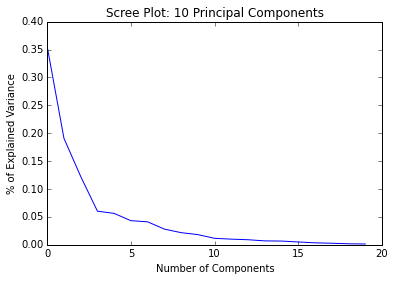

In [14]:
plt.plot(pca.explained_variance_ratio_)
plt.title("Scree Plot: 10 Principal Components")
plt.xlabel("Number of Components")
plt.ylabel("% of Explained Variance")
sum(pca.explained_variance_ratio_)

In [15]:
# Run BO for pca of color histogram
extr_bo(extr_pca_evaluate)

Initialization
-----------------------------------------------------------------------------
 Step |   Time |      Value |   max_depth |   max_features |   n_estimators | 
    1 | 00m02s |    0.62246 |      3.5856 |         6.6806 |       662.6612 | 
    2 | 00m00s |    0.63360 |      6.2033 |         6.6453 |       106.5185 | 
    3 | 00m03s |    0.61059 |      2.1092 |         6.4699 |       794.0662 | 
    4 | 00m03s |    0.63063 |      4.6577 |         5.5549 |       865.2079 | 
    5 | 00m02s |    0.64300 |      6.4370 |         5.1760 |       487.9501 | 
Bayesian Optimization
-----------------------------------------------------------------------------
 Step |   Time |      Value |   max_depth |   max_features |   n_estimators | 
    6 | 00m08s |    0.64052 |      6.9819 |         5.2353 |       291.3719 | 
    7 | 00m05s |    0.60861 |      2.0083 |         6.9009 |       390.6922 | 
    8 | 00m04s |    0.63632 |      6.9672 |         5.1068 |       195.9592 | 
    9 | 00m06s | 

/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -1.51285010e-05]), 'nit': 5, 'funcalls': 49}
  " state: %s" % convergence_dict)


   15 | 00m08s |    0.64176 |      6.9782 |         5.2934 |       725.0743 | 
   16 | 00m06s |    0.63434 |      6.9857 |         6.7640 |       146.6284 | 
   17 | 00m09s |    0.64102 |      7.0000 |         7.0000 |       585.6960 | 
   18 | 00m09s |    0.64473 |      7.0000 |         5.0000 |       337.4465 | 
   19 | 00m12s |    0.64275 |      6.9462 |         5.1526 |       697.0087 | 
   20 | 00m10s |    0.64201 |      6.9761 |         5.0322 |       473.9560 | 
   21 | 00m11s |    0.64028 |      6.9876 |         6.9118 |       323.3535 | 
   22 | 00m11s |    0.64176 |      6.9446 |         5.0260 |       233.6832 | 


/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  4.66285101e-05]), 'nit': 5, 'funcalls': 50}
  " state: %s" % convergence_dict)


   23 | 00m14s |    0.64201 |      6.9734 |         5.1557 |       832.7484 | 
   24 | 00m12s |    0.64176 |      6.9765 |         5.1781 |       355.3129 | 
   25 | 00m12s |    0.64473 |      6.9989 |         5.0207 |       640.0702 | 


/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -2.52890541e-05]), 'nit': 3, 'funcalls': 57}
  " state: %s" % convergence_dict)


   26 | 00m11s |    0.64250 |      6.9727 |         5.0811 |       263.4958 | 
   27 | 00m13s |    0.64473 |      7.0000 |         5.0000 |       753.3322 | 


/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  6.20915438e-05]), 'nit': 4, 'funcalls': 54}
  " state: %s" % convergence_dict)


   28 | 00m12s |    0.64374 |      6.9836 |         5.1799 |       503.8778 | 
   29 | 00m14s |    0.64374 |      6.9840 |         5.0066 |       671.3365 | 
   30 | 00m14s |    0.64003 |      6.9785 |         5.0294 |       771.2159 | 
-----------------------------------------------------

257.319566
Bayesian Optimization Best Score: 0.644730
Bayesian Optimization Best Parameters: {'max_features': 5.0, 'n_estimators': 337.44653446843586, 'max_depth': 7.0}
{'max_val': 0.64473033151905002, 'max_params': {'max_features': 5.0, 'n_estimators': 337.44653446843586, 'max_depth': 7.0}}


In [17]:
# Choose the best params from BO results then predict 
best_estimators = 337
best_max_depth = 7
best_max_features = 5
best_pca_extrc = ExtraTreesClassifier(n_jobs = 4, n_estimators=best_estimators, oob_score=False,
                                max_depth = best_max_depth, max_features = best_max_features)

best_pca_extrc.fit(pca_transformed, train_labels)

# accuracy of trianing dataset
print "Accuracy of best Extra Tree model on train: %s" % str(best_pca_extrc.score(pca_transformed, train_labels))

# accuracy of testing dataset
print "Accuracy of best Extra Tree model on test: %s" % str(best_pca_extrc.score(pca_transformed_test, test_labels))


# use the best params to predict
extrc_pca_true, extrc_pca_pred = test_labels, best_pca_extrc.predict(pca_transformed_test)
extrc_pca_pred

Accuracy of best Extra Tree model on train: 0.718456209797
Accuracy of best Extra Tree model on test: 0.671612265084


array([  24, 1793, 1793, ..., 1793,   24, 1793])

In [18]:
pca_extrc_test_df = fns.result_table(extrc_pca_true, extrc_pca_pred)
pca_extrc_test_df = pca_extrc_test_df.rename(index=str, columns={'predictions': 'extra_tree_pca_pred', 'results': 'extra_tree_pca_res'})
pca_extrc_test_df


,actual,extra_tree_pca_pred,extra_tree_pca_res
33,24,24,True
34,1793,1793,True
35,1793,1793,True
37,1793,24,False
101,1793,1793,True
102,1793,1793,True
105,1793,1793,True
217,1793,24,False
261,1793,1793,True
295,1793,1793,True


In [19]:
pca_extrc_test_df.groupby(['actual', 'extra_tree_pca_pred']).aggregate({'extra_tree_pca_res': 'count'}).unstack()

extra_tree_pca_res          
extra_tree_pca_pred               24   368  1793
actual                                          
24                                 244   34   64
368                                 62  192   80
1793                                50   42  243

In [20]:
extra_tree_com = extrc_test_data_df.merge(pca_extrc_test_df, how='inner', on='actual')
extra_tree_com

,actual,extra_tree_pred,extra_tree_res,extra_tree_pca_pred,extra_tree_pca_res
0,24,24,True,24,True
1,24,24,True,24,True
2,24,24,True,24,True
3,24,24,True,368,False
4,24,24,True,24,True
5,24,24,True,24,True
6,24,24,True,24,True
7,24,24,True,24,True
8,24,24,True,1793,False
9,24,24,True,24,True


In [21]:
extra_tree_com.to_csv('data/extra_tree_com.csv', index=False)

In [22]:
import pickle

# save the model to disk
filename = 'models/extra_tree_pca.sav'
pickle.dump(best_pca_extrc, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_nbc_pca = pickle.load(open(filename, 'rb'))
result_pca = loaded_nbc_pca.score(pca_transformed_test, test_labels)
print(result_pca)

0.671612265084


In [ ]:
# pandas.pivot_table

pd.pivot_table(test_data_df, values='correct', \
               index=['true_label'], columns=['predicted_label'], aggfunc=np.sum)